# Inspect single time steps of the vKdV output with realistic (AR model) boundary conditions

In [1]:
import h5py
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


Bad key "backend.qt5" on line 5 in
/home/mrayson/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%matplotlib notebook

In [3]:
# Load the filed data
###########
#basedir = 'C:\Projects\ARCHub\DATA\FIELD\ShellCrux\'
basedir = '/home/mrayson/group/mrayson/DATA/FIELD/ShellCrux/'
# ncfile = '/home/suntans/Share/ARCHub/DATA/FIELD/ShellCrux/KP150_Fitted_Buoyancy_wout_motion.nc'
ncfile = '{}/KP150_Fitted_Buoyancy_wout_motion_unvenfilt.nc'.format(basedir)

mode = 0
###########

ds1 = xr.open_dataset(ncfile,group='KP150_phs1')
ds2 = xr.open_dataset(ncfile,group='KP150_phs2')

# Merge the two

A_n = xr.concat([ds1['A_n'][:,mode],ds2['A_n'][:,mode]], dim='time')
#a0 = xr.concat([ds1['amp'][:,mode,0],ds2['amp'][:,mode,0]], dim='timeslow')

# Quality control
A_n.loc['2016-09-18':'2016-10-31']=np.nan

In [4]:
def load_vkdv_h5(vkdvfile):
    # Get the time from the beta file
    with h5py.File(vkdvfile,'r') as f:
        time=f['time'][:].astype('<M8[ns]')
        a0 = f['a0'][:]
        A = f['A'][:]
        Amax = f['max_amplitude'][:]
        #z_std = np.array(f['data/z_std'])
        #rho_std = np.array(f['data/rho_std'])
        #rho_mu = np.array(f['data/rho_mu'])
    
    return time, a0, A, Amax
    #nparams, nt, nsamples = beta_samples.shape
    #return xr.DataArray(beta_samples, dims=('params','time','draw'), 
    #             coords={'time':t_beta,'params':range(nparams), 'draw':range(nsamples)})

In [67]:
# testfile = '../output/slim-AR_a0_harmonic_beta/2020-12-18--18-04-08_timepoint-333_output.h5'
testfile = '../output/slim-AR_a0_harmonic_beta/2020-12-18--18-08-21_timepoint-344_output.h5'

# testfile = '../output/slim-AR_a0_harmonic_beta/2020-12-18--18-09-12_timepoint-332_output.h5'
# testfile = '../output/slim-AR_a0_harmonic_beta/2020-12-18--18-09-04_timepoint-334_output.h5'

In [75]:
time, a0, A, Amax = load_vkdv_h5(testfile)
nsample = A.shape[0]
a0.shape, A.shape, time.shape

((500,), (500, 5759), (5759,))

In [69]:
# Calculate the median and credible intervals
A_50 = np.median(A, axis=0)
A_5 = np.percentile(A, 5, axis=0)
A_95 = np.percentile(A, 95, axis=0)
A_1 = np.percentile(A, 1, axis=0)
A_99 = np.percentile(A, 99, axis=0)

<IPython.core.display.Javascript object>


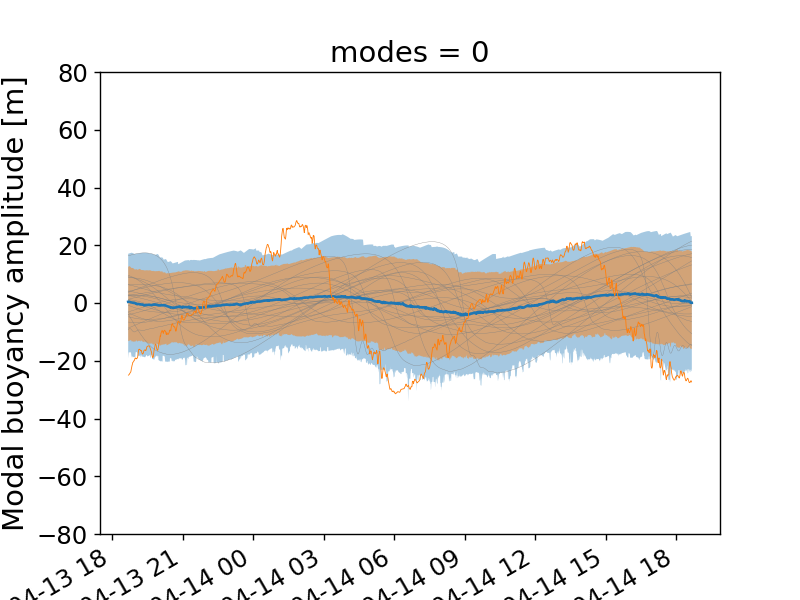

(-80, 80)

In [70]:
Aobs = A_n.sel(time=slice(time[0],time[-1]))


#plt.figure()
plt.figure()
for ii in range(0,nsample,20):
     plt.plot(time,A[ii,:],'0.5',lw=0.2, alpha=0.9)
     #plt.plot(time,a0[ii,:],'navy',lw=0.2)
plt.plot(time, A_50)
plt.fill_between(time, A_1, A_99,alpha=0.4)
plt.fill_between(time, A_5, A_95,alpha=0.5)

Aobs.plot(lw=0.5)    
plt.ylim(-80,80)
# plt.xticks(rotation=17)

<IPython.core.display.Javascript object>


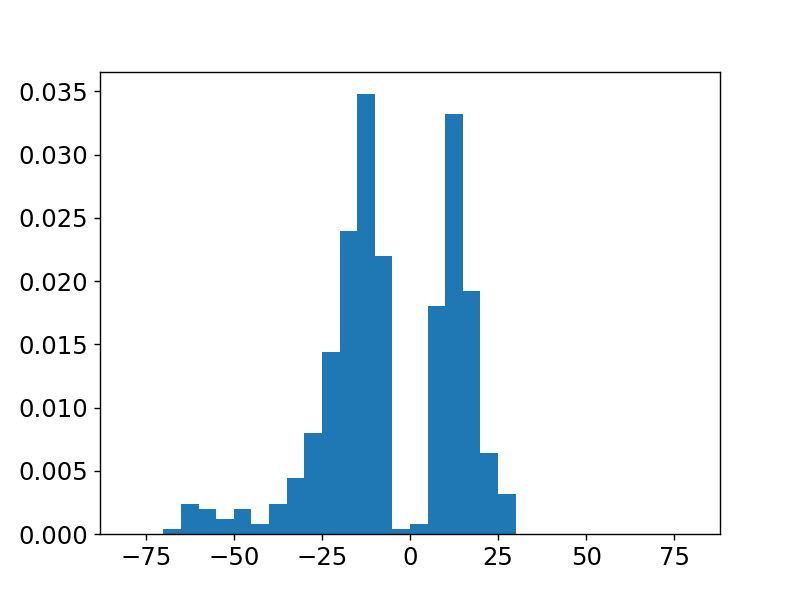

/home/mrayson/group/mrayson/miniconda3/envs/soda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


4.3999999999999995

In [71]:
plt.figure()
plt.hist(Amax, bins=np.arange(-80,85,5), normed=True)

N = Amax.shape[0]
P40 = np.sum(Amax<-40)/N*100
P40

16.400000000000002